In [1]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
seed=0
np.random.seed (seed)
tf.random.set_seed (seed)

In [4]:
(X_train, Y_train), (X_test, Y_test) = imdb.load_data (num_words= 5000)

17465344/17464789 [==============================] - 0s 0us/step


In [9]:
print ( X_train[0])

[1415   33    6   22   12  215   28   77   52    5   14  407   16   82
    2    8    4  107  117    2   15  256    4    2    7 3766    5  723
   36   71   43  530  476   26  400  317   46    7    4    2 1029   13
  104   88    4  381   15  297   98   32 2071   56   26  141    6  194
    2   18    4  226   22   21  134  476   26  480    5  144   30    2
   18   51   36   28  224   92   25  104    4  226   65   16   38 1334
   88   12   16  283    5   16 4472  113  103   32   15   16    2   19
  178   32]


In [5]:
X_train = sequence.pad_sequences(X_train, maxlen= 100)
X_test = sequence.pad_sequences(X_test, maxlen= 100)

In [6]:
model = Sequential()
model.add(Embedding (5000, 100))
model.add(Dropout (0.5))
model.add(Conv1D( 64, 5, padding= 'valid', activation= 'relu', strides= 1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         500000    
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, None, 64)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 55)                26400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 56        
_________________________________________________________________
activation_1 (Activation)    (None, 1)                

In [7]:
model.compile (loss= 'binary_crossentropy',
               optimizer= 'adam',
               metrics = ['accuracy'])

In [8]:
history = model.fit(X_train, Y_train, batch_size=100, epochs=5, validation_data= (X_test, Y_test))
print ("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 31s 1ms/step - loss: 0.4546 - accuracy: 0.7652 - val_loss: 0.3399 - val_accuracy: 0.8520
Epoch 2/5
25000/25000 [==============================] - 30s 1ms/step - loss: 0.2916 - accuracy: 0.8784 - val_loss: 0.3278 - val_accuracy: 0.8583
Epoch 3/5
25000/25000 [==============================] - 30s 1ms/step - loss: 0.2490 - accuracy: 0.8989 - val_loss: 0.3318 - val_accuracy: 0.8584
Epoch 4/5
25000/25000 [==============================] - 30s 1ms/step - loss: 0.2101 - accuracy: 0.9185 - val_loss: 0.3367 - val_accuracy: 0.8590
Epoch 5/5
25000/25000 [==============================] - 7s 260us/step

 Test Accuracy: 0.8525


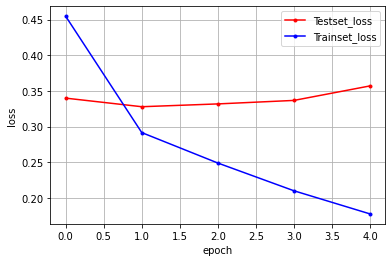

In [10]:
y_vloss = history.history ['val_loss']
y_loss = history.history['loss']

x_len= np.arange(len( y_loss))
plt.plot( x_len, y_vloss, marker='.', c="red", label= 'Testset_loss')
plt.plot( x_len, y_loss, marker= '.', c="blue", label= 'Trainset_loss')

plt.legend (loc= 'upper right')
plt. grid()
plt. xlabel('epoch')
plt. ylabel('loss')
plt. show()